# <span style="color:green"><b>Reminders</b></span>

__<span style="color:green"><b>Root Mean Square Error</b></span>__

<span> $$ \text{RMSE}(\mathbf{X},h) = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m} (h (\mathbf{x} ^{(i)}) - y^{(i)})^2} $$</span>

__<span style="color:green"><b>Mean Absolute Error</b></span>__

<span>$ \text{MAE}(\mathbf{X},h) = \frac{1}{m} \sum \limits _{i=1} ^{m} |h (\mathbf{x} ^{(i)}) - y^{(i)}|$</span>

# <span style="color:#c4571d"><b>Useful Functions</b></span>

## __<span style="color:#c4571d"><b>General</b></span>__

__<span style="color:#c4571d"><b>Imports</b></span>__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import hashlib

__<span style="color:#c4571d"><b>Data Fetching</b></span>__

In [2]:
import os
import tarfile
from six.moves import urllib

##data_path = "/Users/david/JupyterNotebooks/Training/Data" 
##data_url ="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
##data_name = "housing"

def fetch_data(data_url, data_path, data_name = "imported_data"):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path, data_name + ".tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path = data_path)
    data_tgz.close()


data_url ="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
data_path = "/Users/david/JupyterNotebooks/Training/Data"
data_name = "housing"


fetch_data(data_url, data_path, data_name)

__<span style="color:#c4571d"><b>CSV to Data Frame</b></span>__

In [3]:
import pandas as pd


def load_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name + ".csv")
    return pd.read_csv(csv_path)



__<span style="color:#c4571d"><b>Predictions Visualization</b></span>__

In [4]:
##Predictions Visualization

def predictions_visualization(predictors, labels, full_pipeline, predictor, slice_position=10):
    sliced_labels = labels.iloc[:slice_position]
    sliced_predictors = full_pipeline.transform(predictors.iloc[:slice_position])
    
    #Transforming Data in DataFrame
    predictions_and_labels = list(zip(predictor.predict(sliced_predictors), sliced_labels))
    predictions_table = pd.DataFrame(predictions_and_labels, columns=['Predictions', 'Labels'])
    difference = abs(predictions_table["Predictions"] - predictions_table["Labels"])
    predictions_table.insert(loc=2, column="Absolute Difference", value=difference)
    
    #Visualization
    predictions_table.plot(figsize=(12,8))
    print(predictions_table.head(10))
    

## __<span style="color:#c4571d"><b>Test Set</b></span>__

__<span style="color:#c4571d"><b>Constant Set Size</b></span>__

In [5]:

#returns train_set, test_set
def constant_set_size(data, test_ratio):
    shuffled_indice = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

##
#
# "Alternatively"
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
#
##

__<span style="color:#c4571d"><b>Hashed Set</b></span>__

In [6]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio


#returns train_set, test_set
def hashed_split(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    test_set_ids = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~test_set_ids], data.loc[test_set_ids]


##
# housing_with_id = housing.reset_index()
# train_set, test_set = hashed_split(housing_with_id, 0.2, "index")
# 
# "or"
# 
# housing_with_id = housing["longitude"]*1000 + housing["latitude"]
# train_set, test_set = hashed_split(housing_with_id, 0.2, "index")
##

# <span style="color:#ecb471"><b>Data Visualization, Cleaning & Analysis</b></span> 

## __<span style="color:#ecb471"><b>Data Visualization</b></span>__ 

In [7]:
data_path = "/Users/david/JupyterNotebooks/Training/Data"


housing = load_data(data_path, "housing")
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


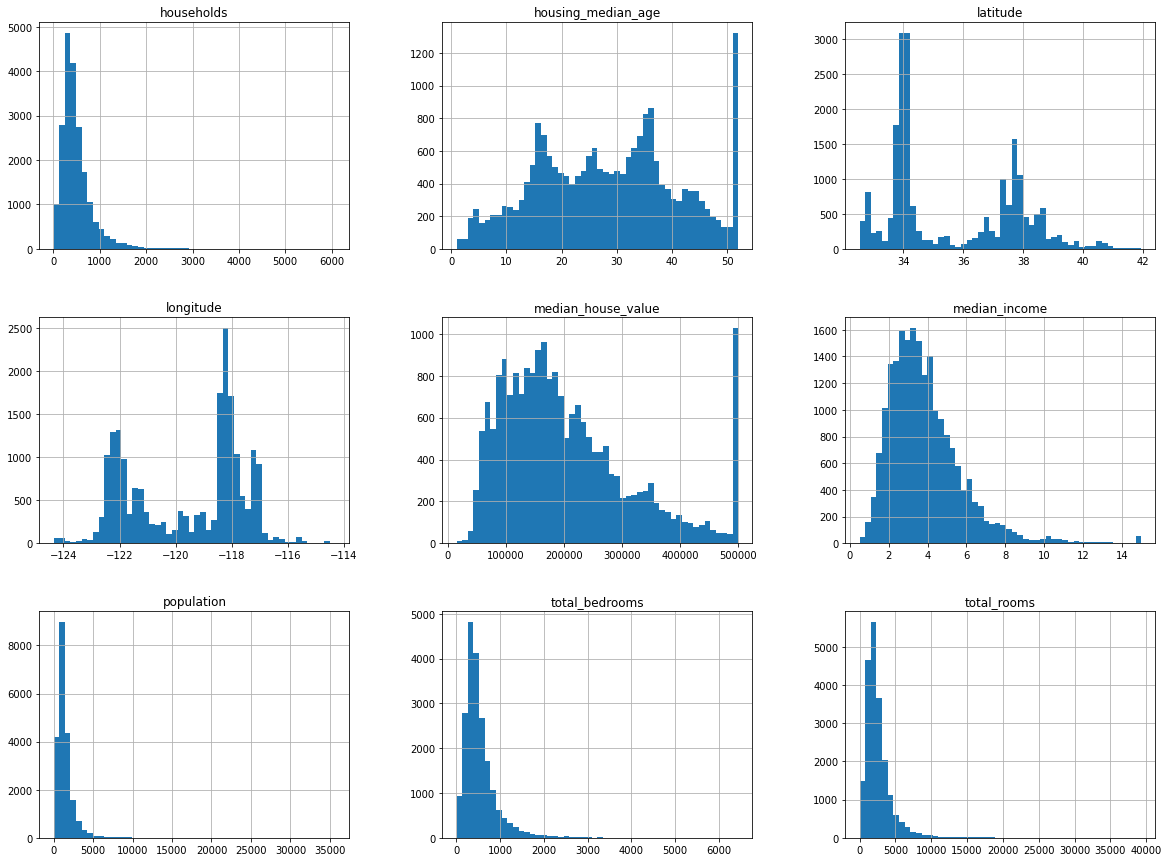

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [12]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
##Stratified Split by "median_income"

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
 

In [14]:
##Removing "income_cat"

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [15]:
##Making copy of housing

housing_copy = strat_train_set.copy()

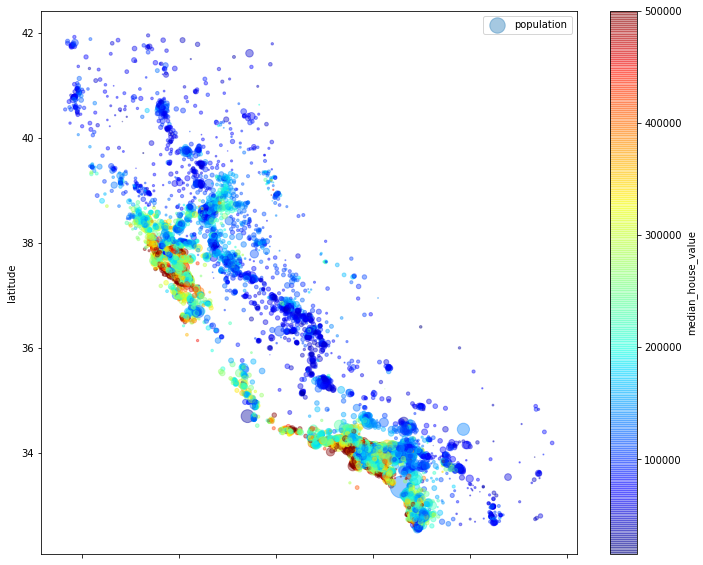

In [16]:
##Visualizing Geographical Data
#s - circle radius; c - colour; cmap - predefined colour map

housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                 s=housing_copy["population"]/75, label="population",
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(12, 10))
plt.legend()

In [17]:
##Correlation

corr_matrix = housing_copy.corr()
corr_matrix.sort_values(by="median_house_value", ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111747910>,
      dtype=object)

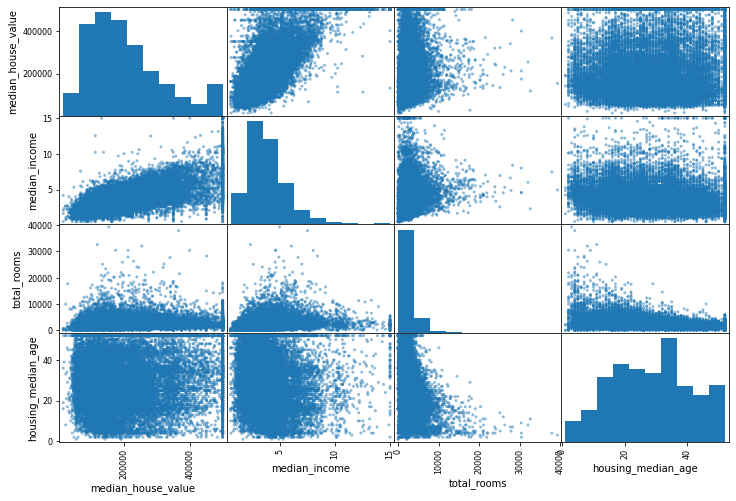

In [18]:
##Correlation_2

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

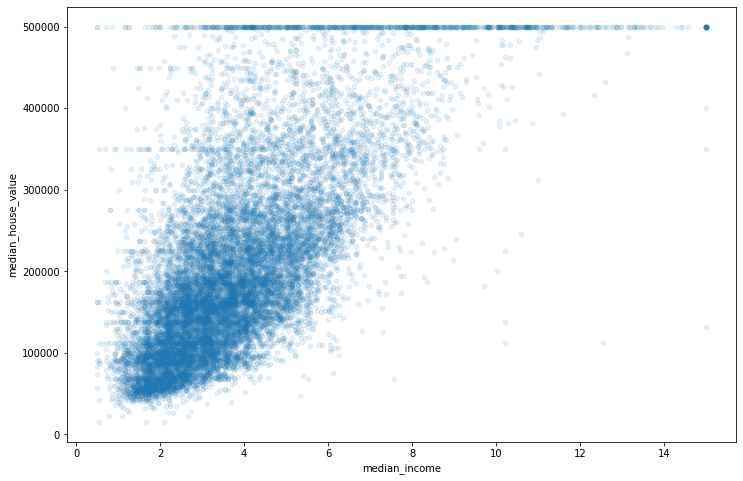

In [19]:
housing_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(12,8))

In [20]:
housing_copy["rooms_per_household"] = housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedroom_per_household"] = housing_copy["total_bedrooms"]/housing_copy["households"]
housing_copy["population_per_household"] = housing_copy["population"]/housing_copy["households"]

corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedroom_per_household      -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

## __<span style="color:#ecb471"><b>Data Cleaning</b></span>__ 

In [21]:
#Predictors
housing = strat_train_set.drop("median_house_value", axis=1)

#Labels
housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
##Imputer and Replace NaNs/Missing Values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#Numerical Housing (without "ocean_proximity")
housing_num = housing.drop("ocean_proximity", axis=1)

#Fitting the Imputer (Imputer computed the median of each attribute and stored results in statistics_)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [23]:
##Replacement of missing values

X = imputer.transform(housing_num)

In [24]:
##Transforming back to DataFrame

housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [25]:
##Handling Text and Categorical Attributes

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

print(housing_cat_encoded,encoder.classes_)

[0 0 4 ... 1 0 3] ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [26]:
##Here we binar-ly encode "ocean_proximity" (eg. either 'INLAND' or not) with OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
##Alternatively for last 2 steps: we use LabelBinarizer

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
##Custom Transformer

#TransformerMixin automatically adds fit_transform() & BaseEstimator adds get_params() & set_params()
#(we avoid *args and **kwargs)
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    #no *args or **kwargs
    def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
    
    def fit(self, X, y=None):
        return self #nothing else to do
    
    #returns initial Set with added Attributes
    def transform(self, X, y=None):
        
        return_list = []
        
        if self.add_rooms_per_household:
            rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
            return_list.append(rooms_per_household)
            
        if self.add_population_per_household:
            population_per_household = X[:, population_ix] / X[:, household_ix]
            return_list.append(population_per_household)
            
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return_list.append(bedrooms_per_room)

        return np.c_[X,np.asarray(return_list).T]

    
#DataFrameSelector

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
        
        
    
#example
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs.shape


(16512, 11)

In [29]:
##Transformations with Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer # It is preferable to use this instead of 

#numerical Pipeline
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attributes_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())
                    ])

#transformed numerical Data
housing_num_tr = num_pipeline.fit_transform(housing_num)


#Combination of all Transformers
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num) # ['longitude', 'latitude', ... , 'median_income']
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attributes),
        ('cat', OneHotEncoder(), cat_attributes)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# <span style="color:#004C99"><b>Training</b></span>

## __<span style="color:#004C99"><b>Linear Regression</b></span>__ 

In [30]:
##Fitting Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

     Predictions    Labels  Absolute Difference
0  210644.604593  286600.0         75955.395407
1  317768.806972  340600.0         22831.193028
2  210956.433312  196900.0         14056.433312
3   59218.988868   46300.0         12918.988868
4  189747.558499  254500.0         64752.441501
5  154295.076245  127900.0         26395.076245
6  426711.931564  500001.0         73289.068436
7  228002.946024  140200.0         87802.946024
8  139801.437386   95000.0         44801.437386
9   30128.001520  500001.0        469872.998480


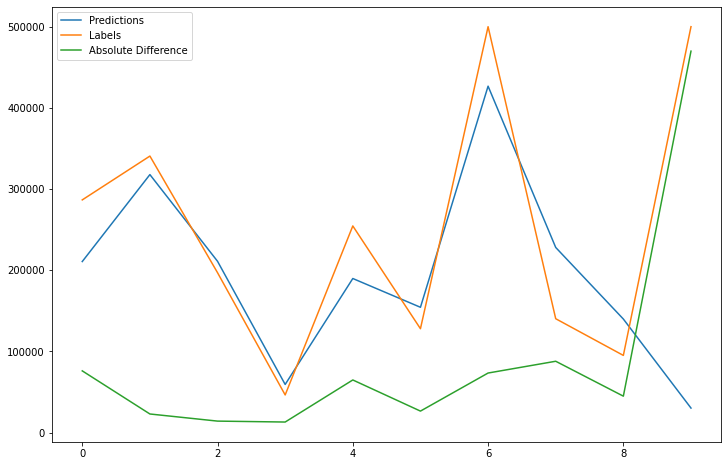

In [31]:
##Linear Regression Visualization

predictions_visualization(housing, housing_labels, full_pipeline, lin_reg)

In [32]:
##Calculation of RMSE

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [33]:
##Cross-validation Linear Regression

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard Deviation:", lin_rmse_scores.std())

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798344


## __<span style="color:#004C99"><b>Decision Trees</b></span>__

In [34]:
##Fitting Decision Trees

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
##Checking the Predictions

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_predictions, housing_labels))
tree_rmse

0.0

In [36]:
##Cross-validating Decision Trees

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard Deviation:", tree_rmse_scores.std())

Scores: [68639.80470713 69115.46992255 71064.38111167 68621.0630539
 70982.16873907 76655.50310283 70667.38798978 71025.52420757
 78034.66705063 69302.62044312]
Mean: 71410.85903282382
Standard Deviation: 3123.4814440564137


## __<span style="color:#004C99"><b>Random Forests</b></span>__

In [37]:
##Fitting RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
##Checking the predictions

housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_predictions, housing_labels))
forest_rmse

18770.868076618313

In [ ]:
##Cross-validating Random Forests

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard Deviation:", forest_rmse_scores.std())

In [ ]:
##Saving the results

import joblib

forest_results = [housing_predictions, forest_scores]
joblib.dump(forest_results, "forest_results.pkl")

In [ ]:
##Loading the Model
forests_model = joblib.load("forest_results.pkl")

## __<span style="color:#004C99"><b>Tweaking the Hyperparameters</b></span>__

In [ ]:
##Tweaking with help of GridSearchCV

##DON'T START (takes about 30 minutes)
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [360], 'max_features': [8]}
    ]

#Most promising Model
forest_reg = RandomForestRegressor()

#if we initialize GridSearchCV with refit=True => it will retrain the best estimator on the whole training set
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
print(grid_search.best_params_, "\n")
print(grid_search.best_estimator_, "\n")

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## __<span style="color:#004C99"><b>Results</b></span>__

In [ ]:
##Fitting

#final_model = grid_search.best_estimator_

final_model = RandomForestRegressor(n_estimators=300, max_features=8)
final_model.fit(housing_prepared, housing_labels)

In [ ]:
##Performance on Test Set

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

In [ ]:
##Confidence Interval

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

In [ ]:
##Saving the results

import joblib

joblib.dump(final_model, "final_model.pkl")

In [ ]:
##Checking JobLib
check_test = joblib.load("final_model.pkl")

In [ ]:
##Performance on Test Set

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = check_test.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse